In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp drive/'My Drive'/facerec/imdb_crop.tar .
!cp drive/'My Drive'/facerec/wiki_crop.tar .

In [1]:
#!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar

--2019-09-16 14:04:05--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811315200 (774M) [application/x-tar]
Saving to: ‘wiki_crop.tar’

wiki_crop.tar       100%[===================>] 773.73M  6.40MB/s    in 1m 59s  

2019-09-16 14:06:06 (6.48 MB/s) - ‘wiki_crop.tar’ saved [811315200/811315200]



In [2]:
#!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar

--2019-09-16 14:06:09--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7012157440 (6.5G) [application/x-tar]
Saving to: ‘imdb_crop.tar’

imdb_crop.tar         4%[                    ] 331.14M   542KB/s    eta 3h 4m  ^C


In [0]:
!tar -xf wiki_crop.tar
!tar -xf imdb_crop.tar

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

In [0]:
def imShowCV(image):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

In [5]:
import os

ages = os.scandir('wiki_crop')
length = 0
for age in ages:
   
   if '.mat' not in str(age.path): 
   
     
     length+=len(os.listdir(age.path))
   
print(length)

62328


In [6]:
import os

ages = os.scandir('imdb_crop')
length = 0
for age in ages:
   
   if '.mat' not in str(age.path): 
   
     
     length+=len(os.listdir(age.path))
   
print(length)

460723


In [7]:
import scipy.io
imdbMat = scipy.io.loadmat('imdb_crop/imdb.mat')
imdbPlace = imdbMat['imdb'][0][0]
print(imdbPlace)
print(len(imdbPlace))
for item in imdbPlace:
  print(item)
  print(len(item[0]))


(array([[693726, 693726, 693726, ..., 726831, 726831, 726831]], dtype=int32), array([[1968, 1970, 1968, ..., 2011, 2011, 2011]], dtype=uint16), array([[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43'),
        array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44'),
        array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43'),
        ...,
        array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44'),
        array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44'),
        array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]],
      dtype=object), array([[1., 1., 1., ..., 0., 0., 0.]]), array([[array(['Fred Astaire'], dtype='<U12'),
        array(['Fred Astaire'], dtype='<U12'),
        array(['Fred Astaire'], dtype='<U12'), ...,
        array(['Jane Levy'], dtype='<U9'),
        array(['Jane Levy'], dtype='<U9'),
        array(['Jane Levy'], dtype='<U9')]], dtype=object), array([[array([[

In [8]:
wikiMat = scipy.io.loadmat('wiki_crop/wiki.mat')
wikiPlace = wikiMat['wiki'][0][0]
print(wikiPlace)
print(len(wikiPlace))
for item in wikiPlace:
  print(item)
  print(len(item[0]))

(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
        array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
        array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
        array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
        array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
        array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
      dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
        array(['Dettmar Cramer'], dtype='<U14'),
        array(['Marc Okrand'], dtype='<U11'), ...,
        array(['Michael Wiesinger'], dtype='<U17'),
        array(['Johann Grugger'], dtype='<U14'),
        array(['Greta Van Susteren'], dtype='<U18')]], dtype=object), array([[array([[111.29109473, 111.29109473, 252.66993082, 252.66993082]]),
  

0
Failed with gender
----------------------
1501
1967
2002
AGE 35
NAME ['Li Gong']
GENDER 0
[[252.2945085   65.21289962 309.65231816 122.57070927]]
4.658591382044849
nan
626


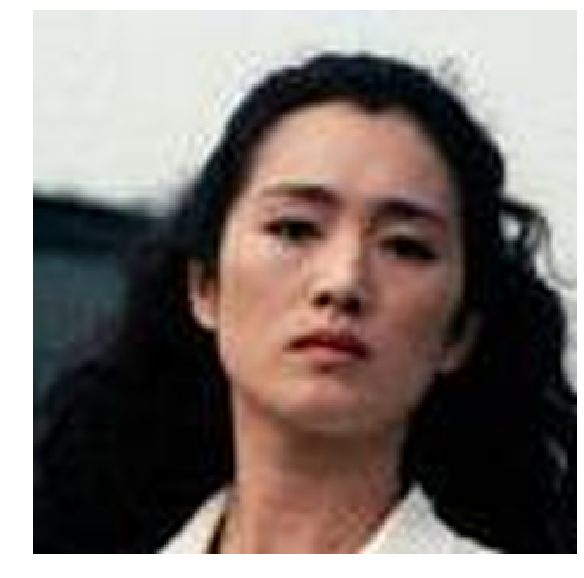

In [72]:
place = imdbPlace
where='imdb_crop'

total = 0



for i in range(460723):
  
  if i % 10000 ==0:
    print(i)
  
  bYear = int(place[0][0][i]/365) #birth year
  taken = place[1][0][i] #photo taken
  path = place[2][0][i][0]
  gender = place[3][0][i] # Female/Male
  name = place[4][0][i] # Name
  faceBox= place[5][0][i] # Face coords
  
  
  faceScore = place[6][0][i] #Face score
  secFaceScore = place[7][0][i] #Sec face score
  
  #Calculating shit
  age = taken - bYear
  
  
  faceScore = str(faceScore)
  secFaceScore = str(secFaceScore)
  
  
  
  
  if 'n' not in faceScore: # n as in Inf; if true, implies that there isn't a face in the image
    
    if 'a' in secFaceScore: #a as in NaN; implies that no second face was found
      
      if age >= 0: 
      
        try:
          gender = int(gender)
          total +=1
          
          if i > 1500:
            
            print('----------------------')
            print(i)
            print(bYear)
            print(taken)
            print("AGE", age)
            print("NAME", name)
            print("GENDER", gender)
            print(faceBox)
            print(faceScore)
            print(secFaceScore)
            
            imShow(os.path.join(where,path))
            break
               
        except:
          print('Failed with gender')
          continue

  
  
  
        
        
  
print(total)

0
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
Failed with gender
----------------------
1997
2

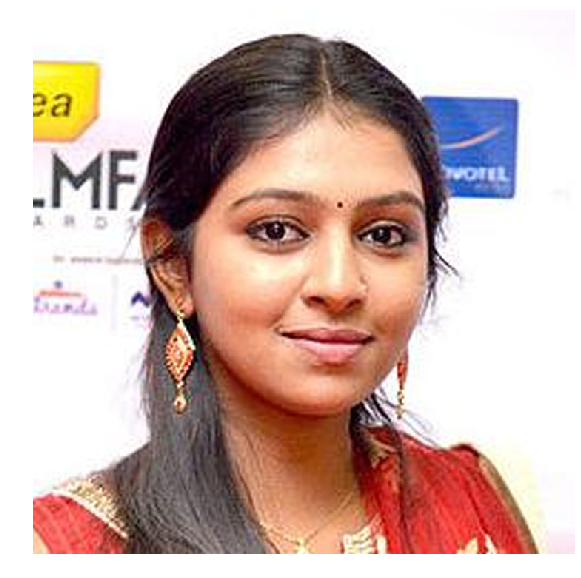

In [79]:
from shutil import copy2
import cv2


place = wikiPlace
where='wiki_crop'
total = 0




listyList = []

for i in range(62328):
  if i % 10000 ==0:
    print(i)
  
  bYear = int(place[0][0][i]/365) #birth year
  taken = place[1][0][i] #photo taken
  path = place[2][0][i][0]
  gender = place[3][0][i] # Female/Male
  name = place[4][0][i] # Name
  faceBox= place[5][0][i] # Face coords
  faceScore = place[6][0][i] #Face score
  secFaceScore = place[7][0][i] #Sec face score
  
  #Calculating shit
  age = taken - bYear
  
  
  faceScore = str(faceScore)
  secFaceScore = str(secFaceScore)
  
  
  
  
  if 'n' not in faceScore: # n as in Inf; if true, implies that there isn't a face in the image
    
    if 'a' in secFaceScore: #a as in NaN; implies that no second face was found
      
      if age >= 0: 
      
        try:
          gender = int(gender)
          total += 1
          
          if i > 5000:
            
            print('----------------------')

            print(bYear)
            print(taken)
            print("AGE", age)
            print("NAME", name)
            print("GENDER", gender)
            print(faceBox)
            print(faceScore)
            print(secFaceScore)
            
            imShow(os.path.join(where,path))
            break
               
        except:
          print('Failed with gender')
          continue

  
  
  
        
        
print(total)
      